In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# 1. Iris 데이터 로딩
iris = load_iris()
X = iris.data[:100, [0, 2]]  # 꽃받침 길이(sepal length), 꽃잎 길이(petal length)
y = iris.target[:100]        # Setosa(0) vs. Versicolor(1)

# 2. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 3. 데이터 정규화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
# 퍼셉트론 모델 생성 및 학습
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [11]:
# 테스트 데이터로 예측
y_pred = ppn.predict(X_test_std)

# 정확도 출력
print(f'테스트 정확도: {np.mean(y_pred == y_test):.2f}')

테스트 정확도: 1.00


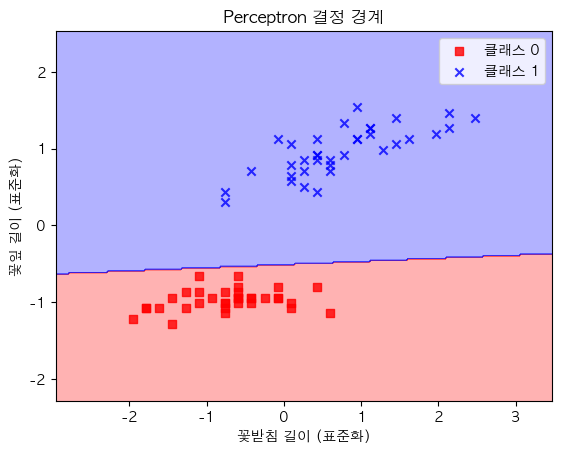

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

matplotlib.rc('font', family='AppleGothic')         # macOS 기본 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

# 결정 경계를 시각화하는 함수
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    """
    X: 입력 데이터 (2차원)
    y: 정답 레이블 (0 또는 1)
    classifier: 훈련된 퍼셉트론 모델
    resolution: 경계 시각화를 위한 격자 해상도 (작을수록 더 정밀)
    """

    # 마커와 컬러맵 설정
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # 고유한 클래스 수에 맞게 색상 지정

    # 결정 경계를 위한 meshgrid 생성
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 꽃받침 길이
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 꽃잎 길이
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # 모델 예측
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 각 좌표 (xx1, xx2)에 대해 퍼셉트론 모델의 예측값을 계산
    # - ravel(): 1차원 벡터로 평탄화
    # - .T: (n_samples, 2) 형태로 맞춤

    # 원래 그리드 형태로 다시 reshape (그래프 형태 맞추기 위해) 
    Z = Z.reshape(xx1.shape)

    # 등고선 그리기
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # contourf: 등고선 채우기
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 실제 데이터 점 찍기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,  # 투명도
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'클래스 {cl}')

# 시각화 실행
plot_decision_regions(X_train_std, y_train, classifier=ppn)
plt.xlabel('꽃받침 길이 (표준화)')
plt.ylabel('꽃잎 길이 (표준화)')
plt.legend()
plt.title('Perceptron 결정 경계')
plt.show()